# **Introduction**

- Customer churn is a critical metric for telecom companies. It represents the number of customers who discontinue their services during a given time frame. Understanding the reasons behind churn can help companies retain customers, improve services, and boost profitability.

- Dataset: This analysis uses a sample dataset containing information on telecom customers including demographics, account information, services subscribed, and churn status.

<center><img src="https://raw.githubusercontent.com/pramodm1609/raw_images/refs/heads/main/telcoCustomerChurnImage.png" width='90%' height='50%'></p></center>


# **Problem Statement**

**Business Context**
- A leading telecommunications company is experiencing a significant customer churn rate, affecting its revenue and market share. In a highly competitive industry where acquiring new customers is far more costly than retaining existing ones, understanding the patterns and causes of churn is critical to developing effective customer retention strategies.

**Business Objective**
- The primary goal is to analyze customer data to identify the key factors contributing to churn and build insights that can guide strategic actions to reduce customer attrition.


# **Importing Libraries**

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
# from pandas_profiling import ProfileReport                          # Importing Pandas Profiling (To generate Univariate Analysis)

#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface of matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import datetime                                                     # For datetime operations
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

# **Data Acquisition & Description**

The data set includes information about:

- Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

| Records | Features | Dataset Size |
| :--: | :--: | :--: |
| 7043 | 21 | 977.5 kB |

<br>

| # | Feature Name | Feature Description |
|:--:|:--|:--|
|1| Customer ID | Customer ID |
|2| Gender | Whether the customer is a male or a female |
|3| SeniorCitizen |	Whether the customer is a senior citizen or not (1, 0) |
|4| Partner | Whether the customer has a partner or not (Yes, No) |
|5| Dependents | Whether the customer has dependents or not (Yes, No) |
|6| tenure |	Number of months the customer has stayed with the company |
|7| PhoneService |	Whether the customer has a phone service or not (Yes, No) |
|8| MultipleLines |	Whether the customer has multiple lines or not (Yes, No, No phone service) |
|9| InternetService | Customer’s internet service provider (DSL, Fiber optic, No) |
|10| OnlineSecurity | Whether the customer has online security or not (Yes, No, No internet service) |
|11| OnlineBackup |	Whether the customer has online backup or not (Yes, No, No internet service) |
|12| DeviceProtection | Whether the customer has device protection or not (Yes, No, No internet service) |
|13| TechSupport | Whether the customer has tech support or not (Yes, No, No internet service) |
|14| StreamingTV |	Whether the customer has streaming TV or not (Yes, No, No internet service) |
|15| StreamingMovies |	Whether the customer has streaming movies or not (Yes, No, No internet service) |
|16| Contract |	The contract term of the customer (Month-to-month, One year, Two year) |
|17| PaperlessBilling | Whether the customer has paperless billing or not (Yes, No) |
|18| PaymentMethod | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card |
|19| MonthlyCharges |	The amount charged to the customer monthly |
|20| TotalCharges | The total amount charged to the customer |
|21| Churn | Whether the customer churned or not (Yes or No) |

In [ ]:
churn_data = pd.read_csv('https://raw.githubusercontent.com/pramodm1609/Projects/refs/heads/main/EDA/Customer-Churn-Analysis-Project/Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print('Shape of the dataset:', churn_data.shape)
churn_data.head()

Shape of the dataset: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
churn_data.isna().value_counts()

,,,,,,,,,,,,,,,,,,,,,count
customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7043


In [ ]:
churn_data.duplicated().value_counts()

,count
False,7043


In [ ]:
churn_data['SeniorCitizen'] = churn_data['SeniorCitizen'].replace([1,0],['Yes','NO'])

In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Observations**
- No missing values are observed in the dataset
- No duplicated rows were found
- no outliers are present
- All dataset is cleaned

# **Exploratory Data Analysis**

**Male and Female Customer**

In [ ]:
churn_data['gender'].value_counts()

,count
gender,
Male,3555
Female,3488


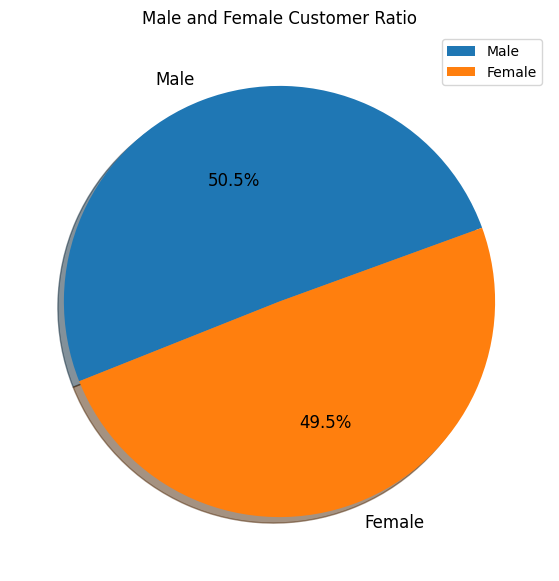

In [ ]:
figure = plt.figure(figsize=(10,7))
churn_data['gender'].value_counts().plot(kind='pie',autopct='%3.1f%%',fontsize=12,startangle=20,shadow=True,legend=True,label='',)
# plot(kind='pie',autopct='%3.1f%%',wedgeprops=dict(width=0.15),explode=np.ones(12)/10,figsize=(9, 9),fontsize=12,startangle=20,shadow=True,cmap='inferno',legend=True,label='',)
plt.legend()
# plt.
plt.title('Male and Female Customer Ratio')

plt.show()

**Observations**
- Male and Female customer ratio are almost same
- There are total 3555 Male customer and 3488 Female customers

**count of Senior Citizen customers**

In [ ]:
churn_data['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
NO,5901
Yes,1142


In [ ]:
value = churn_data['SeniorCitizen'].unique()

In [ ]:
# Define colors based on value
colors = ['green' if v == 'Yes' else 'orange' for v in value]
labels = ['Senior Citizen' if v == 'Yes' else 'Non-Senior Citizen' for v in value]

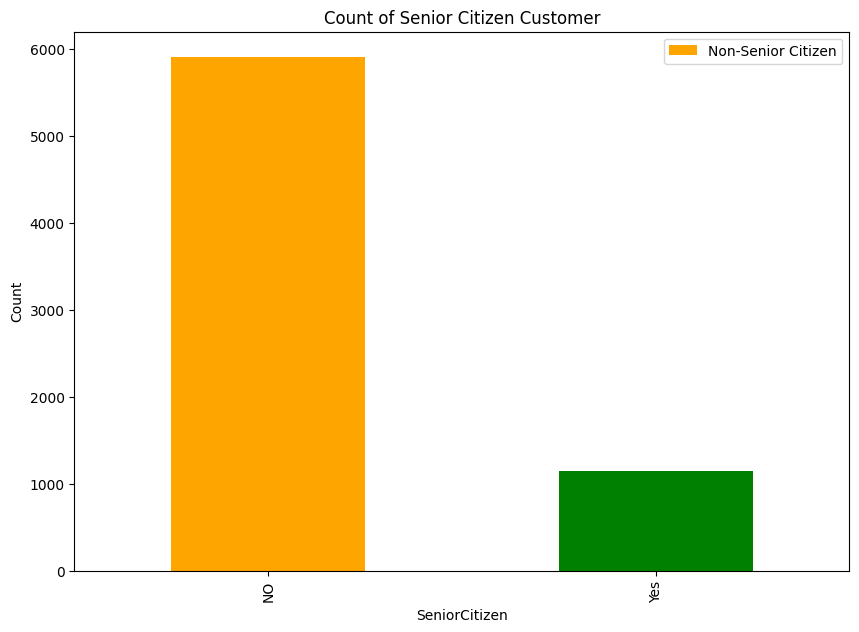

In [ ]:
from typing import Any
figure = plt.figure(figsize=(10,7))
churn_data['SeniorCitizen'].value_counts().plot(kind='bar', color=colors, legend=True)
plt.title('Count of Senior Citizen Customer')
# plt.xlabel('Customer')
plt.ylabel('Count')
plt.legend(labels)

plt.show()

Observations
- There are total 1142 serior citizen customer and 5901 customer is non-senior citizen

**Distribution of customer tenure**

In [ ]:
churn_data['tenure'].describe()

,tenure
count,7043.000000
mean,32.371149
std,24.559481
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


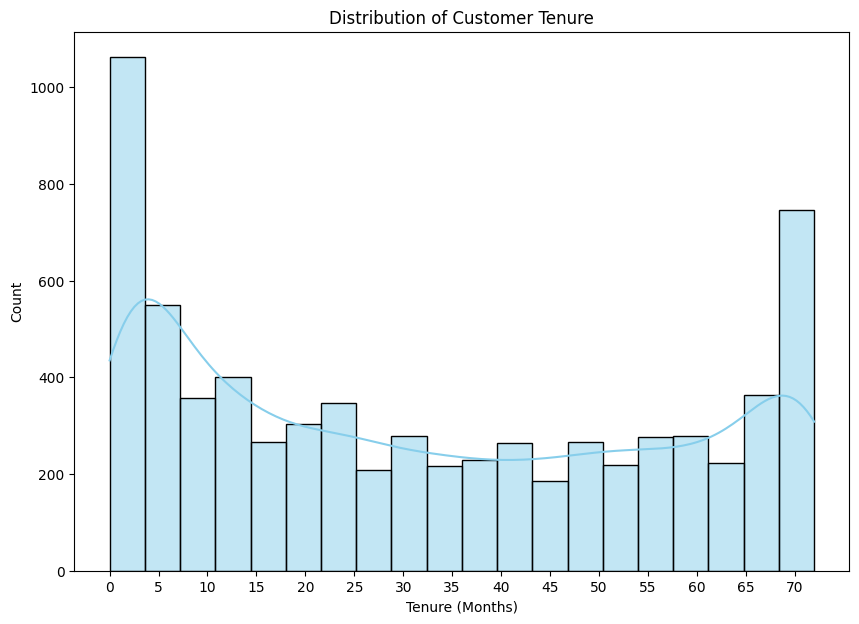

In [ ]:
figure = plt.figure(figsize=(10,7))
sns.histplot(data=churn_data, x='tenure', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.xticks(ticks=np.arange(0,74,5))
plt.show()

**Observations**
- more than 1000 customer continued plan for only 0-5 months tenure
- only 200-400 customers are continued plan for between 10-60
  months tenure
- only 700 customer more than 60 months tenure plan

**How many customer are using DSL and Fiber Optic**

In [ ]:
churn_data['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526


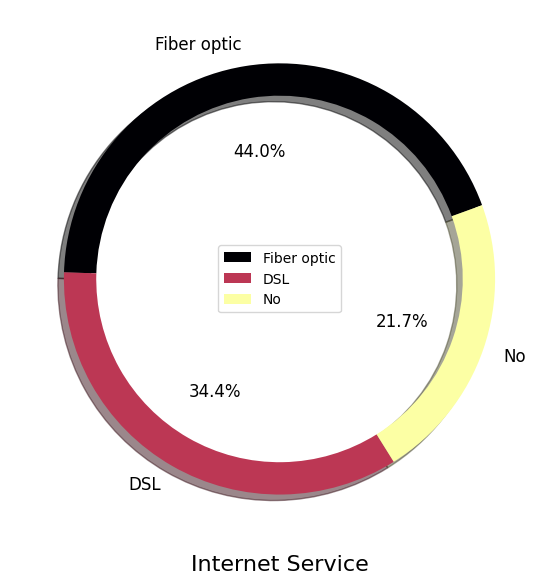

In [ ]:
figure = plt.figure(figsize=(10,7))

churn_data['InternetService'].value_counts().plot(kind='pie',autopct='%3.1f%%',wedgeprops=dict(width=0.15),fontsize=12,startangle=20,shadow=True,cmap='inferno',legend=True,label='',)

# Adding some cosmetics
plt.xlabel(xlabel='Internet Service', fontsize=16)

plt.legend(loc = 'center')
# Display the output
plt.show()

**Observations**
- 3096(44%) customer are using Fiber Optic service
- 2421(34.4%) customer are using DSL service

**Number of Unique Customers by Contract Type**

In [ ]:
values = churn_data.groupby('Contract')['customerID'].nunique()
values

,customerID
Contract,
Month-to-month,3875
One year,1473
Two year,1695


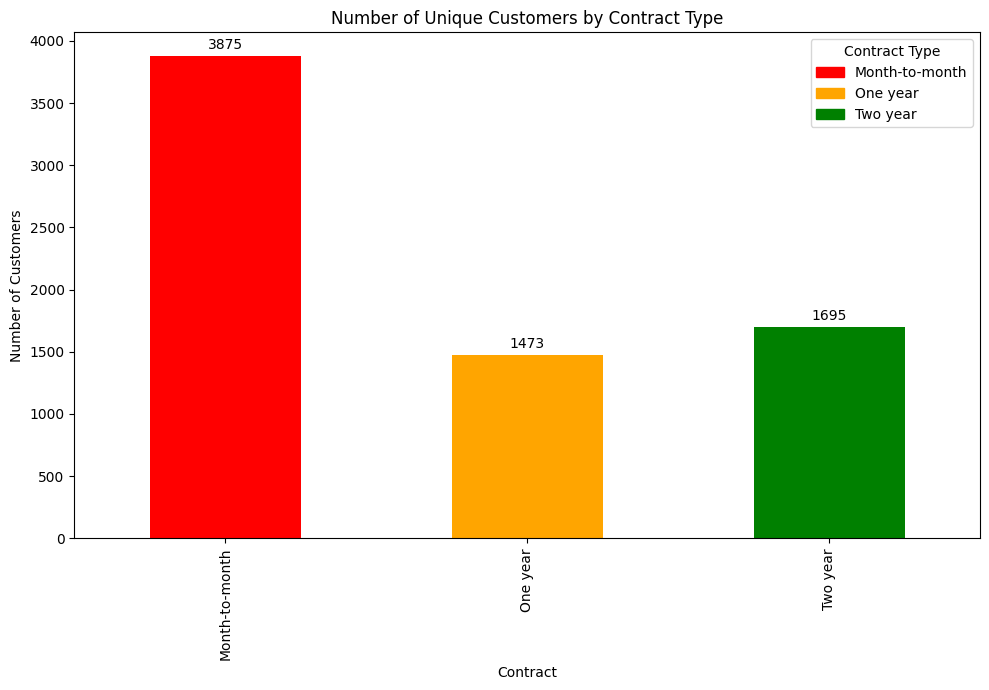

In [ ]:
import matplotlib.pyplot as plt

# Set up figure
fig = plt.figure(figsize=(10, 7))

# Define custom colors and labels
bar_colors = ['red', 'orange', 'green']
# bar_label = ['Month-to-month', 'One year', 'Two year']
bar_label = churn_data['Contract'].unique()
# Group data
contract_counts = churn_data.groupby('Contract')['customerID'].nunique()

# Create bar plot using pandas
ax = contract_counts.plot.bar(color=bar_colors)

# Add data labels on top of bars
for container in ax.containers:
    ax.bar_label(container, padding=3)

# Add title and axis labels
ax.set_title('Number of Unique Customers by Contract Type')
ax.set_ylabel('Number of Customers')

# Add custom legend
from matplotlib.patches import Patch
legend_patches = [Patch(color=color, label=label) for color, label in zip(bar_colors, bar_label)]
ax.legend(handles=legend_patches, title='Contract Type')

plt.tight_layout()
plt.show()


**Observations**
- Total 3875 uniques customer have their contract type month-to-month
- 1473 customer have one year contract and 1695 have 2 years contract

**Number of Unique Customers churned**

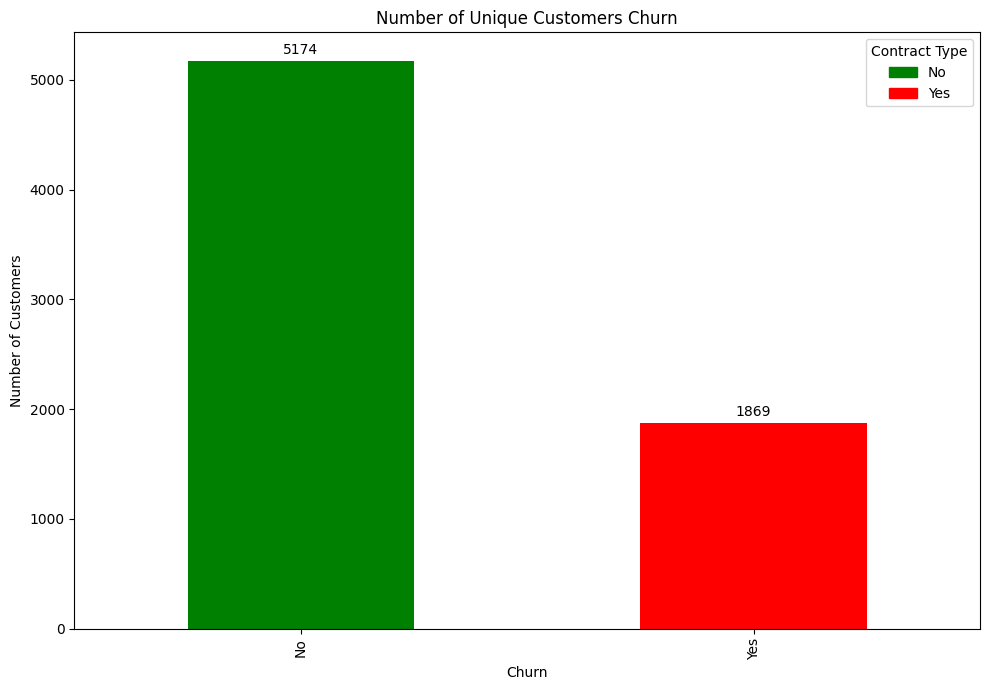

In [ ]:
import matplotlib.pyplot as plt

# Set up figure
fig = plt.figure(figsize=(10, 7))

# Define custom colors and labels
bar_colors = ['Green', 'Red']
# bar_label = ['Month-to-month', 'One year', 'Two year']
bar_label = churn_data['Churn'].unique()
# Group data
churn_counts = churn_data.groupby('Churn')['customerID'].nunique()

# Create bar plot using pandas
ax = churn_counts.plot.bar(color=bar_colors)

# Add data labels on top of bars
for container in ax.containers:
    ax.bar_label(container, padding=3)

# Add title and axis labels
ax.set_title('Number of Unique Customers Churn')
ax.set_ylabel('Number of Customers')

# Add custom legend
from matplotlib.patches import Patch
legend_patches = [Patch(color=color, label=label) for color, label in zip(bar_colors, bar_label)]
ax.legend(handles=legend_patches, title='Contract Type')

plt.tight_layout()
plt.show()


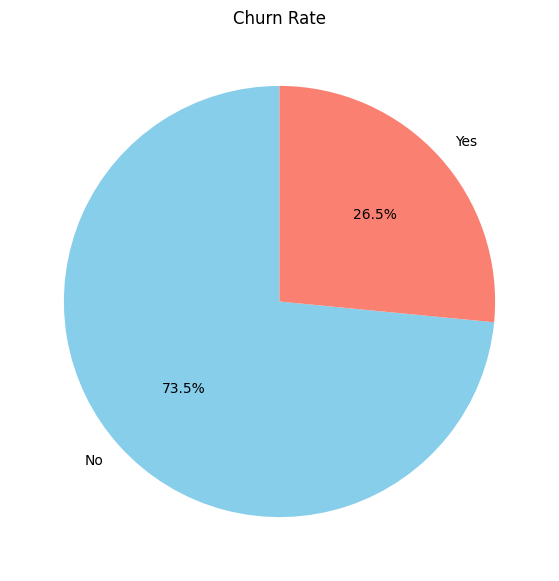

In [ ]:
# Pie Chart
# Set up figure
fig = plt.figure(figsize=(10, 7))
churn_counts = churn_data['Churn'].value_counts()
churn_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'], labels=['No', 'Yes'])
plt.title('Churn Rate')
plt.ylabel('')
plt.show()

**Observations**
- Out of 7043 unique customers, 1869(26.53%) customer is churned

**Understand how churn varies by Contract type.**

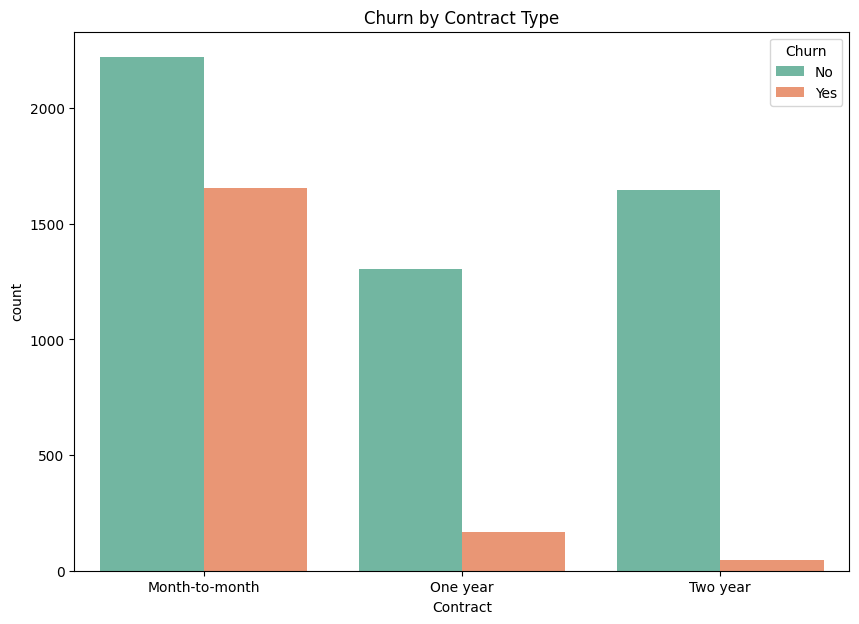

In [ ]:
# Set up figure
fig = plt.figure(figsize=(10, 7))
sns.countplot(data=churn_data, x='Contract', hue='Churn', palette='Set2')
plt.title('Churn by Contract Type')
plt.show()

**Observations**
- Customer who has month-to-month contract has more churned then one year and two year contract
- Also, we observed customer who has month-to-month contract stayed more

**how customer tenure affects churn.**

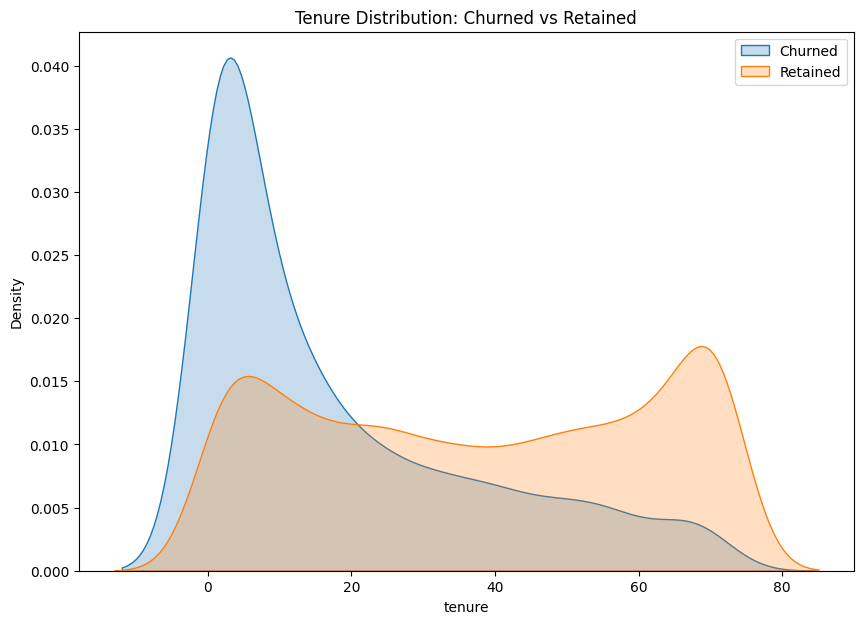

In [ ]:
# Set up figure
fig = plt.figure(figsize=(10, 7))

sns.kdeplot(data=churn_data[churn_data['Churn'] == 'Yes'], x='tenure', label='Churned', fill=True)
sns.kdeplot(data=churn_data[churn_data['Churn'] == 'No'], x='tenure', label='Retained', fill=True)
plt.title('Tenure Distribution: Churned vs Retained')
plt.legend()
plt.show()


**Observations**
- We observed that customer with less tenure has churned more then more tenure customer
- Customer who has long tenure are believe to be retained, seems they had a good service from the service provider

**Analyze churn behavior based on Monthly bill amount**

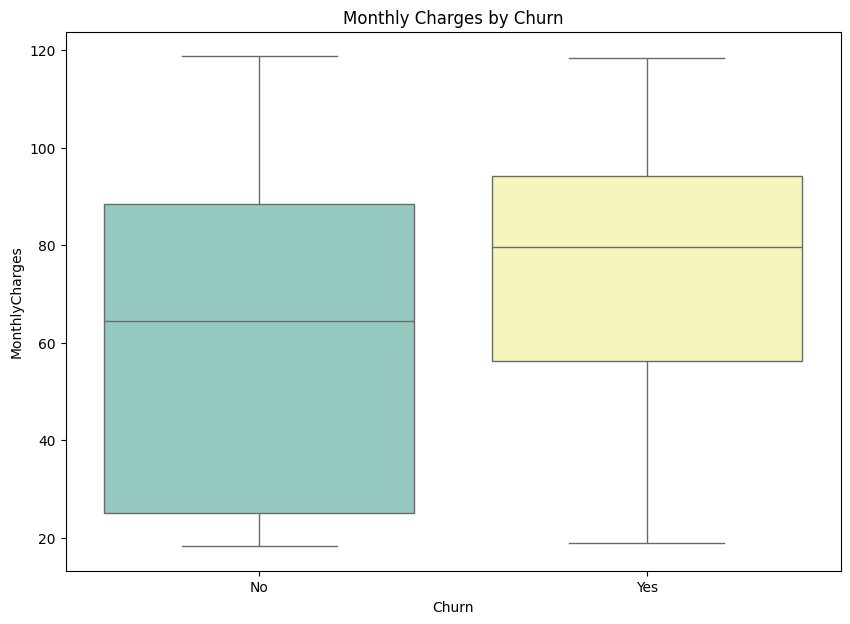

In [ ]:
# Set up figure
fig = plt.figure(figsize=(10, 7))
sns.boxplot(data=churn_data, x='Churn', y='MonthlyCharges', palette='Set3')
plt.title('Monthly Charges by Churn')
plt.show()


**Observations**
- Customer who are paying more monthly charges are prefered to change the service provider than the customer with less monthly charges


**Correlation between features and churn**

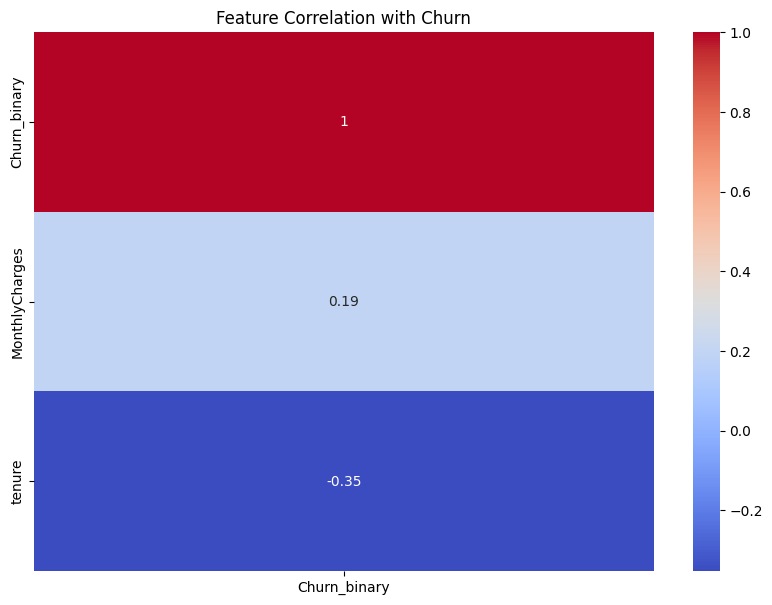

In [ ]:
# Set up figure
fig = plt.figure(figsize=(10, 7))
# Convert categorical Churn to binary
churn_data['Churn_binary'] = churn_data['Churn'].map({'Yes': 1, 'No': 0})

# Plot correlation heatmap
corr = churn_data.corr(numeric_only=True)
sns.heatmap(corr[['Churn_binary']].sort_values(by='Churn_binary', ascending=False), annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Churn')
plt.show()


**Analyze churn behavior based on Senior Citizen**

In [ ]:
churn_data.groupby('SeniorCitizen')['Churn'].value_counts()

SeniorCitizen  Churn
NO             No       4508
               Yes      1393
Yes            No        666
               Yes       476
Name: count, dtype: int64

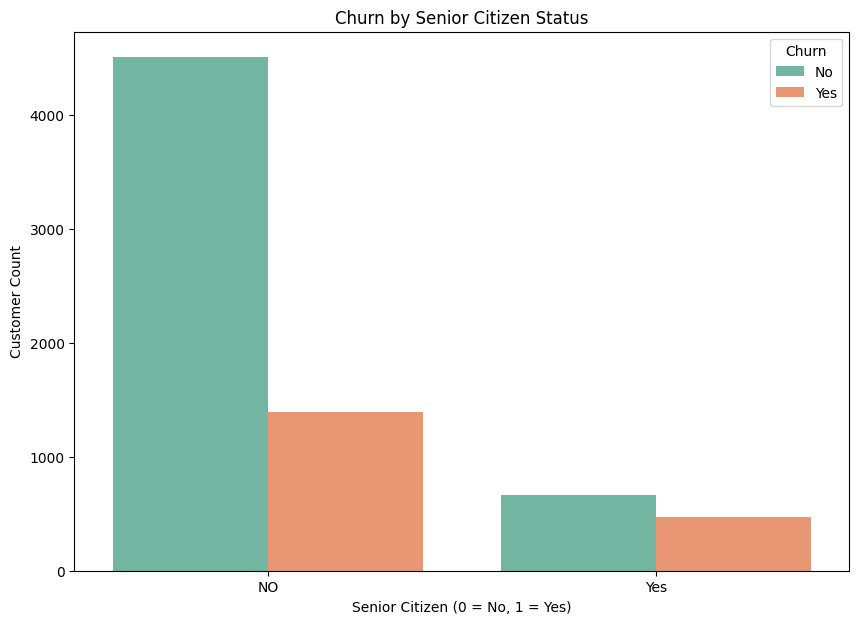

In [ ]:
# Set up figure
fig = plt.figure(figsize=(10, 7))
sns.countplot(data=churn_data, x='SeniorCitizen', hue='Churn', palette='Set2')
plt.title('Churn by Senior Citizen Status')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Customer Count')
plt.legend(title='Churn')
plt.show()

<a name = Section9></a>

---
# **Summarization**
---

<a name = Section91></a>
### **Key Insights:**

- **Contract Type Matters:**
  Customers on month-to-month contracts are far more likely to churn than those on one-year or two-year contracts, suggesting that longer commitments reduce churn due to increased customer lock-in or satisfaction..

- **Senior Citizens Have Higher Churn Risk:**
  A notable proportion of senior citizens churn, possibly due to pricing sensitivity or usability concerns. This demographic may need tailored support or pricing plans

- **Higher Monthly Charges Correlate with Churn:**
  Customers who churn tend to have higher monthly charges, indicating potential dissatisfaction with the value received relative to cost. This points to the importance of pricing strategy and perceived service value.

- **Lower Tenure, Higher Churn:**
  Churned customers often have shorter tenures, meaning that retention strategies are most critical in the early months of customer onboarding.

- **Service Features Influence Churn:**
  Add-ons like tech support, streaming services, and device protection can influence retention. Customers not subscribed to these features may feel less embedded in the service ecosystem.

<a name = Section92></a>
### **Business Recommendations**

- Promote long-term contracts with incentives like discounts or bundled services.

- Target early-tenure customers with onboarding support, personalized offers, and proactive engagement.

- Review pricing models to ensure alignment with value delivered, especially for high-charge plans.

- Introduce senior-focused plans with simplified services, lower costs, or dedicated support.

- Invest in customer feedback loops to quickly detect and resolve dissatisfaction triggers.

